# Gradient Descent from Scratch 

Referensi: https://developer.ibm.com/articles/implementing-logistic-regression-from-scratch-in-python/

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from tqdm import tqdm

### Generate Data Dummy

In [2]:
data_1 = np.random.random(20)*2 + 1
data_2 = np.random.random(20)*2 - 0.5

In [3]:
data = pd.DataFrame()
data['X'] = np.concatenate([data_1, data_2])
data['y'] = [0]*20 + [1]*20
data = data.sample(frac=1)

In [4]:
data.head()

,X,y
9,1.070253,0
33,0.025284,1
20,-0.383870,1
5,1.274067,0
39,0.369044,1


In [5]:
data.shape

(40, 2)

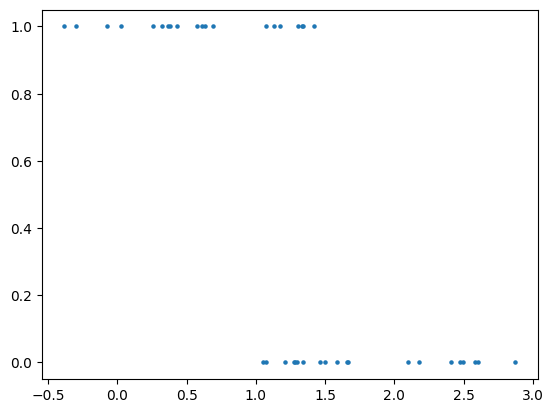

In [6]:
plt.scatter(data['X'], data['y'], s=5)

In [11]:
# Create sigmoid function

def sigmoid(z):
    return 1. / (1. + np.exp(-z))

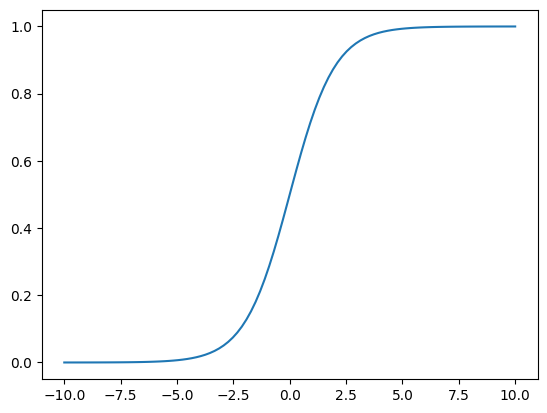

In [12]:
x = np.linspace(-10, 10, 100)
y = sigmoid(x)

plt.plot(x, y)

In [13]:
data.head()

,X,y
9,1.070253,0
33,0.025284,1
20,-0.383870,1
5,1.274067,0
39,0.369044,1


### Create Log Loss Function

In [14]:
# function to calculate Negative Log Likelihood

def neg_log_likelihood(data, theta):
    """
    Parameters
    ----------
    data (DataFrame): Data yang akan di proses
    theta (float): Parameter yang digunakan oleh sigmoid function
    
    Returns
    -------
    -loss_func (float): output akhir dari perhitungan loss function
    """
    # inisialisasi data
    N = len(data)
    X = data['X']
    y = data['y']
    
    # parameter sigmoid
    z = theta[0] + (theta[1] * X)
    
    prob = sigmoid(z)
    
    loss_func = 0
    
    for i in range(N):
        
        # log loss
        loss_func += y[i]*np.log(prob[i]) + (1-y[i])*np.log(1-prob[i])

    return -loss_func

In [15]:
# inisialisasi random parameter in theta

theta = np.random.rand(2)

In [16]:
neg_log_likelihood(data=data,
                   theta=theta)

35.4094235580942

### Create Log Loss Gradient 

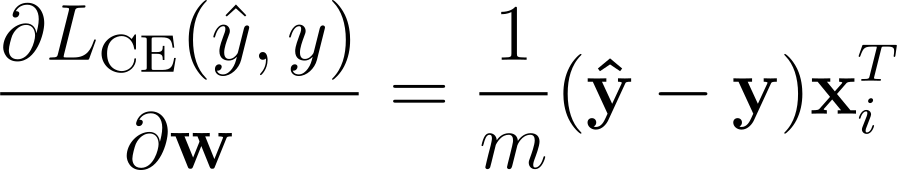

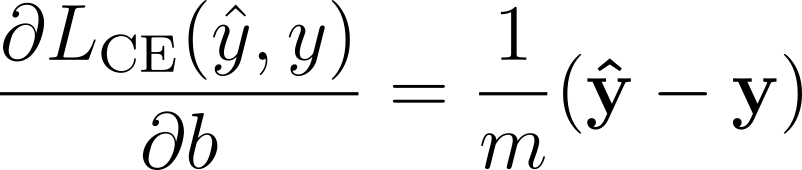

In [17]:
# function untuk menghitung negative log likelihood gradient

def neg_log_likelihood_grad(data, theta):
    """
    Parameters
    ----------
    data (DataFrame): Data yang akan di proses
    theta (float): Parameter yang digunakan oleh sigmoid function
    
    Returns
    -------
    -grad_theta_0 (float): output akhir dari perhitungan derivative param theta_0
    -grad_theta_1 (float): output akhir dari perhitungan derivative param theta_1
    """
    # inisialisasi data
    N = len(data)
    X = data['X']
    y = data['y']
    
    # parameter sigmoid
    z = theta[0] + (theta[1] * X)
    
    prob = sigmoid(z)
    
    # proses derivative params theta
    grad_theta_0 = np.sum(y - prob)
    grad_theta_1 = np.dot(y - prob, X)
    
    return np.array([-grad_theta_0, -grad_theta_1])

### Calculate Gradient Descent 

Rumus dari Gradient Descent

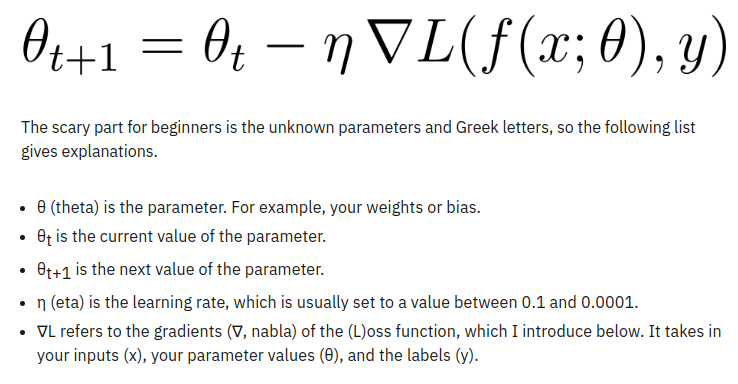

In [20]:
# function untuk menghitung gradient descent logistic regression

def calculate_gradient_descent(data, theta, 
                               learning_rate,
                               max_iter, epsilon=1e-6):
    """
    Parameters
    ----------
    data (DataFrame): Data yang akan di proses
    theta (float): Parameter yang digunakan oleh sigmoid function
    learning_rate (float): Parameter yang digunakan untuk mengatur seberapa cepat atau lambat gradient kita
    max_iter (int): Parameter untuk mau melakukan iterasi berapa kali
    epsilon (float): Parameter untuk error
    
    Returns
    -------
    theta_update (float): Output akhir parameter dari perhitungan gradient descent
    l_history (float): History dari perhitungan likelihood
    """
    l_history = []
    theta_update = theta.copy() # biar immutable

    for i in tqdm(range(max_iter)):
        l_i = neg_log_likelihood(data, theta_update) # calculate log loss
        grad_i = neg_log_likelihood_grad(data, theta_update) # calculate log loss grad
        
        l_history.append(l_i) # likelihood yang dihitung dan masukkan history nya
        
        # karena kita ingin mencari nilai paling kecil, maka dikurangi
        theta_update -= learning_rate * grad_i 
        
        # jika nilai grad lebih kecil dari epsilon atau nilai yg berkurang tidak signifikan maka akan stop
        if np.abs(grad_i).all() < epsilon:
            break
        
    return theta_update, l_history

In [21]:
theta = np.random.rand(2)
theta, history = calculate_gradient_descent(data, theta,
                                            learning_rate=1e-4,
                                            max_iter=10_000)

theta

100%|████████████████████████████████████| 10000/10000 [00:16<00:00, 604.92it/s]


array([ 2.32903736, -2.10398806])

In [22]:
history[-10:]

[14.738157599033878,
 14.737904399688965,
 14.737651240938638,
 14.737398122773254,
 14.737145045183178,
 14.73689200815879,
 14.736639011690459,
 14.736386055768548,
 14.73613314038345,
 14.73588026552554]

### Plotting

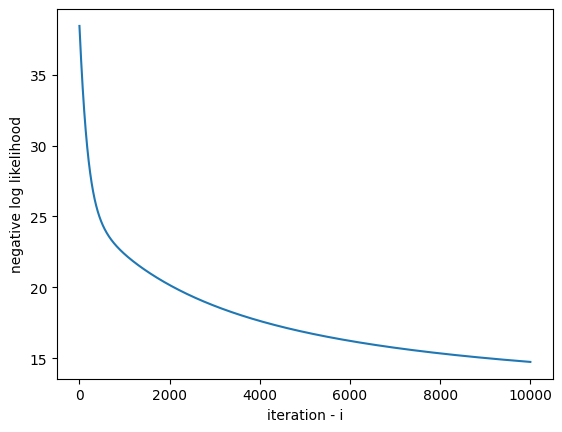

Best params = [ 2.32903736 -2.10398806]
Best error = 14.73588026552554


In [27]:
# Plot solution
plt.plot(np.arange(len(history)), history)
# plt.yscale('log')
plt.xlabel('iteration - i')
plt.ylabel('negative log likelihood')
# plt.xticks([i for i in range(len(history)) if i%1000==0])
plt.show()

print(f"Best params = {theta}")
print(f"Best error = {history[-1]}")

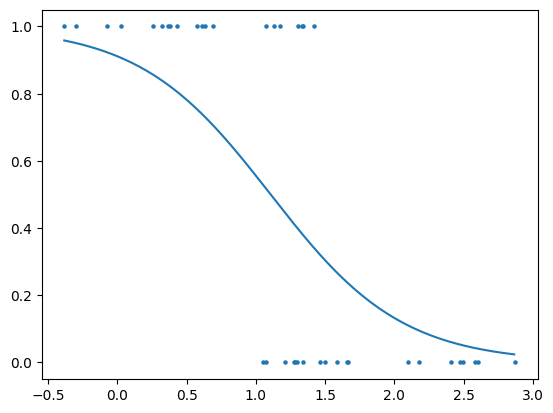

In [28]:
plt.scatter(data['X'], data['y'], s=5)

x_vals = np.arange(data['X'].min(), data['X'].max(), .01)
p_vals = sigmoid(theta[0] + (theta[1]*x_vals))
plt.plot(x_vals, p_vals)

### Built-In Solution

Kalo di scikit-learn itu params lambda nya seperti ini --> $\frac{1}{C}$

In [29]:
clf = LogisticRegression(penalty='l2',
                         solver='liblinear',
                         max_iter=1000,
                         C=0.0001)

In [30]:
clf.fit(np.array(data['X']).reshape(-1, 1), data['y'])
print(f"Theta_0: {clf.intercept_[0]}")
print(f"Theta_1: {clf.coef_[0][0]}")

Theta_0: 1.4358460051079486e-06
Theta_1: -0.0011877196903522598


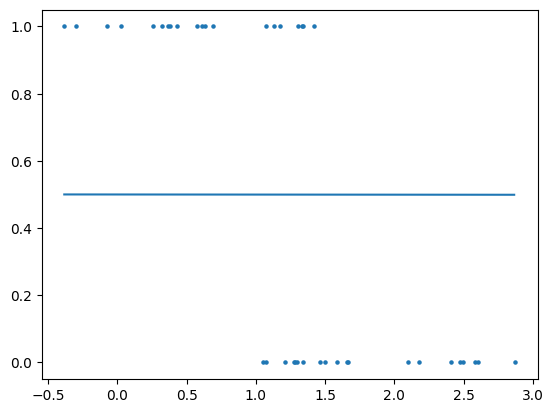

In [31]:
plt.scatter(data['X'], data['y'], s=5)

x_vals = np.arange(data['X'].min(), data['X'].max(), .01)
p_vals = 1 / (1 + np.exp(-(clf.intercept_[0] + clf.coef_[0][0]*x_vals)))
plt.plot(x_vals, p_vals)